--------------


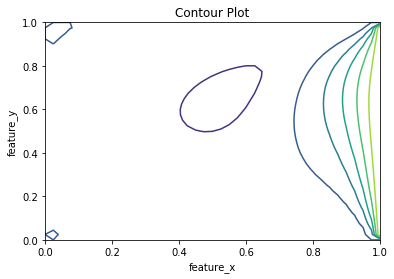

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import logging
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.INFO)
#plt.style.use('seaborn-white')
n=41; L=1; U=1; h = L/(n-1);re = 100;t=0; dt=(re * h**2)/4 ;#
dt = 1e-3; #dt2 = 4/(re * U**2); #dt = min(dt1,dt2)
tm=0.2; maxe = 1e-5; mu=0.01; rho = 1;
#print(L)
si= np.zeros((n,n))
u= np.zeros((n,n))
v= np.zeros((n,n))
p= np.zeros((n,n))
om= np.zeros((n,n))
omt= np.zeros((n,n))
k=0
#while t<tm:
 #   t= t+dt
for k in range(5000):
        
        #BCs
        
    for i in range(n):
        if i>0 and i<(n-1):
            omt[i,-1] = -2 * ((si[i,-2] + U*h)/h**2)
            omt[i,0] = -2 * (si[i,1] /h**2)
                
    for j in range(n):
        if j>0 and j<(n-1):
            omt[0,j] = -2 * (si[1,j] /h**2)
            omt[-1,j] = -2 * (si[-2,j] /h**2)
        
    sit = si.copy()
    om = omt.copy()
        #Vor
    for i in range(n-1):
        for j in range(n-1):
            if i>0 & i<n-1:
                if j>0 & j<n-1:
                    A = (si[i,j+1] - si[i,j-1])/(2*h) #u
                    B = -((si[i+1,j] - si[i-1,j])/(2*h)) #v
                    C = (om[i+1,j] - om[i-1,j])/(2*h) #d(om)/dx
                    D = (om[i,j+1] - om[i,j-1])/(2*h) #d(om)/dy
                    E = (om[i+1,j]+om[i-1,j]+om[i,j+1]+om[i,j-1]-(4*om[i,j]))/(h**2) #rhs
                        
                    omt[i,j] = om[i,j] + dt * (-( (A*C) + (B*D) )+ (E/re))
                    si[i,j] = (si[i+1,j] + si[i-1,j]+si[i,j+1]+si[i,j-1]+(omt[i,j] * h**2))/4
                        
    for i in range(n):
        if i>0 and i<n-1:
            u[i,-1] = U
    for i in range(n):
        for j in range(n):
            if i>0 and i<n-1:
                if j>0 and j<n-1:
                    u[i,j] = (sit[i,j+1] - sit[i,j-1])/(2*h)
                    v[i,j] = -((sit[i+1,j] - sit[i-1,j])/(2*h))
        
    if k>5:
        err = abs(omt-om)
        e = err.max()
        if e<maxe:
                #print('Converged, error \n', e)
            break
    #print('\n value of omega at time',t, 'is \n', om)
    #print('-------------------------------------------')

                
#print(u)
print('--------------')
#print(v)
#-------------ploting
x = np.linspace(0, 1,n)
y = np.linspace(0, 1,n)

  
# Creating 2-D grid of features
X, Y = np.meshgrid(x, y)
  
fig, ax = plt.subplots(1, 1)
  
Z = u
  
# plots contour lines
ax.contour(X, Y, Z)
  
ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
  
plt.show()

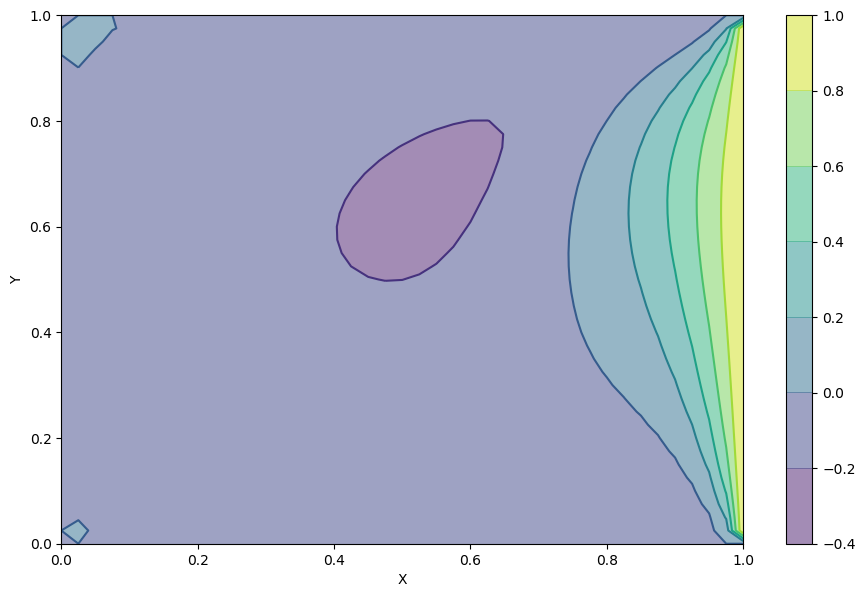

In [5]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(X, Y, Z, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, Z, cmap=cm.viridis)
#plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
plt.xlabel('X')
plt.ylabel('Y');

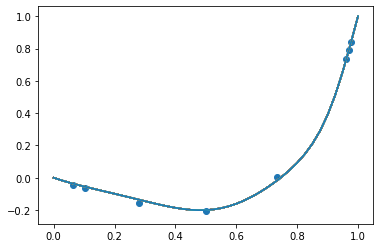

In [10]:
a = [0.9766,0.9688,0.9609,0.7344,0.5,0.2813,0.1016,0.0625]
b = [0.84123,0.7887,0.73722,0.00332,-0.20581,-0.15662,-0.06434,-0.04192]
plt.plot(Y, u[round(n/2),:])
plt.scatter(a,b)